In [1]:
### Import modules for PCA and drawing figures

import numpy as np

import scipy.linalg
import pandas as pd
import sklearn
import sklearn.decomposition as dec
import sklearn.datasets as ds

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Check input data for blanks
df = pd.read_csv('genotype_sub_1200Kb_1.csv')
df.apply(lambda x: sum(x.isnull()),axis=0)

Entry           0
S1_685089       4
S1_2121019      4
S1_2663630      4
S1_4126643      4
S1_4949941      4
S1_6816075      4
S1_7570553      4
S1_8948707      4
S1_10126572     4
S1_11497147     4
S1_12596401     4
S1_14146784     4
S1_15230086     4
S1_15649603     4
S1_17985174     4
S1_19102222     4
S1_19388105     4
S1_20575218     4
S1_22036345     4
S1_22899121     4
S1_24044487     4
S1_26094755     4
S1_27337141     4
S1_28090493     4
S1_29132740     4
S1_30359323     4
S1_32233797     4
S1_33300078     4
S1_33901894     4
               ..
S11_20408169    4
S11_22445343    4
S11_23801539    4
S11_24336494    4
S11_25512741    4
S11_27359519    4
S11_28443472    4
S12_1061666     4
S12_2309353     4
S12_3098413     4
S12_3663811     4
S12_4935878     4
S12_7022815     4
S12_8237086     4
S12_9099557     4
S12_10740654    4
S12_11168036    4
S12_13052192    4
S12_14157206    4
S12_15414608    4
S12_16544907    4
S12_17601614    4
S12_18083967    4
S12_20016130    4
S12_208700

In [3]:
### Clean up input data
headerlist=list(df.columns.values)
headerlist.pop(0)
for i in headerlist:
    df[i].fillna(df[i].mean(), inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Entry           0
S1_685089       0
S1_2121019      0
S1_2663630      0
S1_4126643      0
S1_4949941      0
S1_6816075      0
S1_7570553      0
S1_8948707      0
S1_10126572     0
S1_11497147     0
S1_12596401     0
S1_14146784     0
S1_15230086     0
S1_15649603     0
S1_17985174     0
S1_19102222     0
S1_19388105     0
S1_20575218     0
S1_22036345     0
S1_22899121     0
S1_24044487     0
S1_26094755     0
S1_27337141     0
S1_28090493     0
S1_29132740     0
S1_30359323     0
S1_32233797     0
S1_33300078     0
S1_33901894     0
               ..
S11_20408169    0
S11_22445343    0
S11_23801539    0
S11_24336494    0
S11_25512741    0
S11_27359519    0
S11_28443472    0
S12_1061666     0
S12_2309353     0
S12_3098413     0
S12_3663811     0
S12_4935878     0
S12_7022815     0
S12_8237086     0
S12_9099557     0
S12_10740654    0
S12_11168036    0
S12_13052192    0
S12_14157206    0
S12_15414608    0
S12_16544907    0
S12_17601614    0
S12_18083967    0
S12_20016130    0
S12_208700

C:\Users\Laura\Miniconda\envs\cse801\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


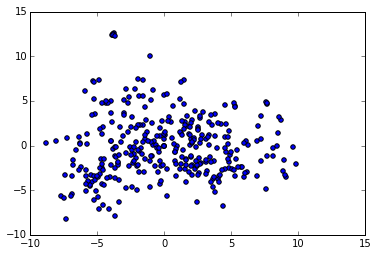

In [4]:
### Transform data using PCA.  Plot first two components to verify
X=df.drop('Entry',1)
norm_bis = dec.PCA().fit_transform(X)
plt.figure(1)
plt.scatter(norm_bis[:,0], norm_bis[:,1])

In [5]:
### Generate eigenvectors and eigenvalues for data set.
Y=X.as_matrix()
mean = Y.mean(axis=0)

Y_cent=np.zeros((Y.shape[0], Y.shape[1]))

for k in range(Y.shape[0]):
    Y_cent[k]=Y[k]-mean

Cov =np.dot(np.transpose(Y_cent),Y_cent)

eig_values,eig_vectors  = scipy.linalg.eig(Cov)




C:\Users\Laura\Miniconda\envs\cse801\lib\site-packages\matplotlib\transforms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=np.float_).reshape(2, 2)


(0, 316)

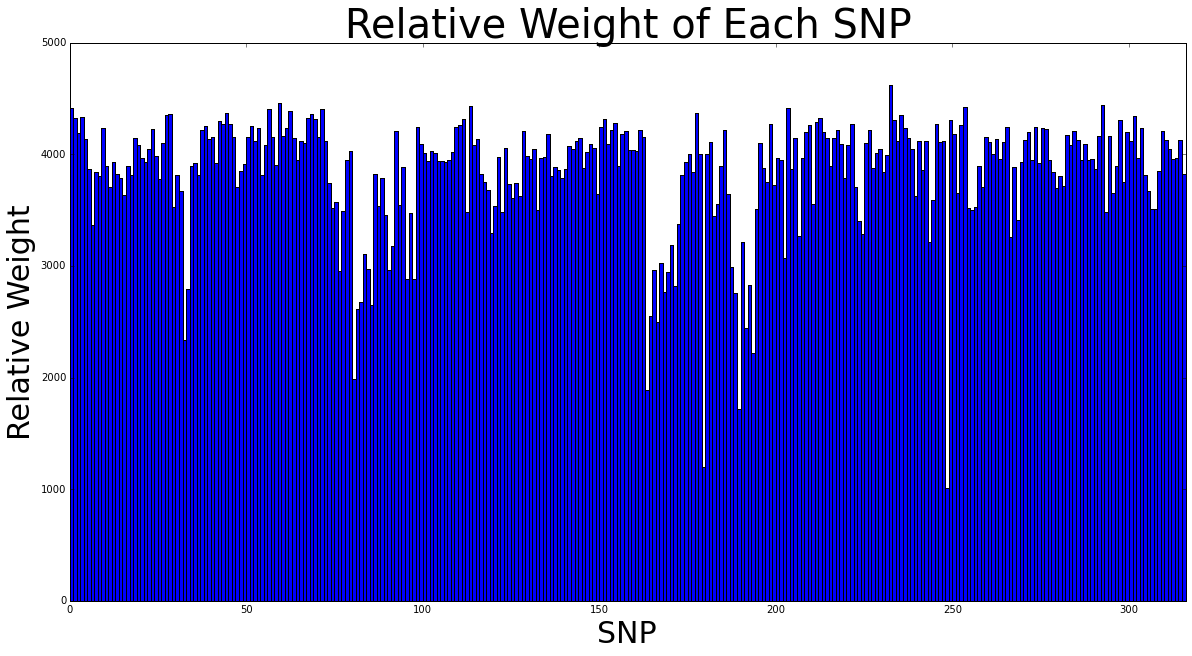

In [6]:
### Calculate relative weights for each variable
weightedlist=list()
for i in range(len(eig_vectors[:,0])):
    weight=0
    for j in range(len(eig_vectors[0,:])):
        weight=weight+abs(eig_vectors[i,j])*eig_values[j]
    weightedlist.append(weight)
plt.figure(2,figsize=(20,10))
xs=[x for x in range(len(eig_values))]
plt.title("Relative Weight of Each SNP",size=40)
plt.bar(xs,weightedlist,width=1)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.ylabel('Relative Weight',size=30)
plt.xlabel('SNP',size=30) 
plt.xlim([0,316])

    

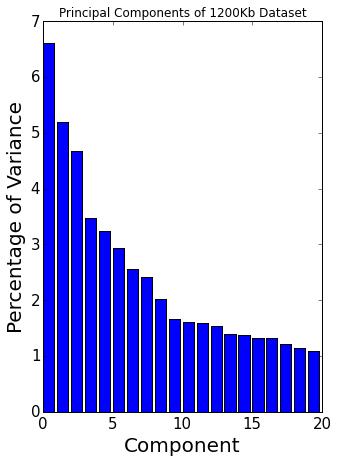

In [7]:
### Convert eigenvalues to percentages of data set variance and plot top 20
total=sum(eig_values)
pltlist=list()
for i in range(20):
    pltlist.append(eig_values[i]/total*100)
plt.figure(1,figsize=(5,7))
xs=[x for x in range(20)]
plt.title("Principal Components of 1200Kb Dataset")
plt.bar(xs,pltlist,width=0.8)
plt.ylabel('Percentage of Variance', size=20)
plt.xlabel('Component', size=20)

In [8]:
### Create 30%, 40% and 50% variance data sets using eigenvectors with largest eigenvalues.
sum30=0
sum40=0
sum50=0
weight=0
for i in range(len(eig_values)):
    weight=eig_values[i]/sum(eig_values)*100+weight
    if weight<50:
        sum50=i+1
        if weight<40:
            sum40=i+1
            if weight<30:
                sum30=i+1
                
norm30=dec.PCA(n_components=sum30+1).fit_transform(X)
norm40=dec.PCA(n_components=sum40+1).fit_transform(X)
norm50=dec.PCA(n_components=sum50+1).fit_transform(X)

print(norm30.shape)
print(norm40.shape)
print(norm50.shape)

(337, 8)
(337, 14)
(337, 22)


In [9]:
### Output 30%, 40% and 50% as csv files for use in other models.
ef=pd.DataFrame(norm30,index=df['Entry'])
ff=pd.DataFrame(norm40,index=df['Entry'])
gf=pd.DataFrame(norm50,index=df['Entry'])
ef.to_csv('./genotype_PCA_30p_1200Kb.csv')
ff.to_csv('./genotype_PCA_40p_1200Kb.csv')
gf.to_csv('./genotype_PCA_50p_1200Kb.csv')